# 로지스틱 후진처리

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1)
y = convert_data['Churn'].astype(int)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# 인덱스 재설정 (reset_index)
X_train = X_train_scaled.reset_index(drop=True)
X_test = X_test_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# LogisticRegression 모델로 후진제거 시작
def backward_elimination_logistic(X_train, X_test, y_train, y_test, significance_level=0.05):
    model = LogisticRegression(solver='liblinear')  # LogisticRegression 모델 선언

    while True:
        # 모델 학습
        model.fit(X_train, y_train)

        # 모델 평가
        y_pred_class = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred_class)
        precision = precision_score(y_test, y_pred_class)
        recall = recall_score(y_test, y_pred_class)
        f1 = f1_score(y_test, y_pred_class)

        # 중간 결과 출력
        print(f"\nAfter removing feature(s), Current Model Performance:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")

        # 모델의 변수 중요도(coefficient) 확인
        coefficients = model.coef_[0]
        min_coefficient = np.min(np.abs(coefficients))

        # 가장 작은 절대값의 coefficient를 가진 변수 제거
        if min_coefficient < significance_level:
            # 해당 변수를 제거
            worst_feature_index = np.argmin(np.abs(coefficients))
            worst_feature = X_train.columns[worst_feature_index]

            print(f"Removing '{worst_feature}' with coefficient {coefficients[worst_feature_index]}")
            X_train = X_train.drop(columns=[worst_feature])
            X_test = X_test.drop(columns=[worst_feature])
        else:
            break  # 모든 변수의 coefficient가 유의미한 경우 루프 종료

    return X_train, X_test, model

# 후진제거 실행
X_train_reduced, X_test_reduced, final_model = backward_elimination_logistic(X_train, X_test, y_train, y_test)

# 최종 모델 학습 및 평가
y_pred_class = final_model.predict(X_test_reduced)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# 최종 평가 결과 출력
print("\nFinal Model Performance:")
print(f"Final Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


Backward Elimination Progress:  68%|██████▊   | 38/56 [00:08<00:01, 11.34it/s]

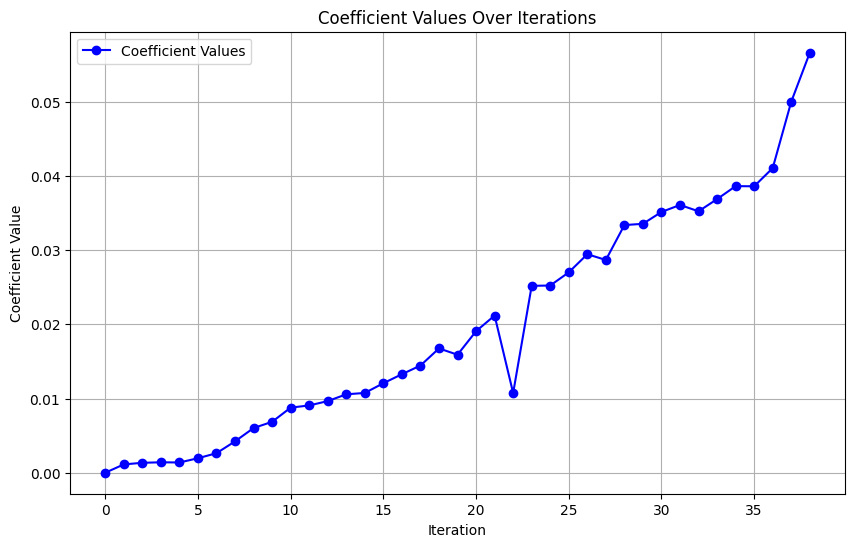

Backward Elimination Progress:  68%|██████▊   | 38/56 [00:08<00:03,  4.58it/s]


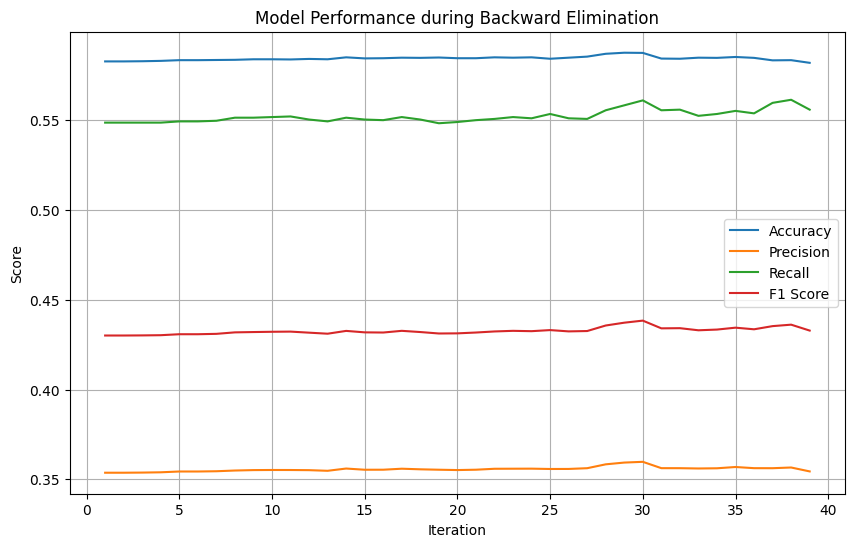


Final Model Performance:
Final Model Accuracy: 0.5820246913580247
Precision: 0.3543998244459074
Recall: 0.5559380378657487
F1 Score: 0.43285982310372556


In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda
import matplotlib.pyplot as plt
from tqdm import tqdm  # 진행바를 위한 라이브러리

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1)
y = convert_data['Churn'].astype(int)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# 인덱스 재설정 (reset_index)
X_train = X_train_scaled.reset_index(drop=True)
X_test = X_test_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



# LogisticRegression 모델로 후진제거 시작
def backward_elimination_logistic(X_train, X_test, y_train, y_test, significance_level=0.05):
    model = LogisticRegression(solver='liblinear', class_weight='balanced')  # 클래스 불균형 해결

    features = X_train.columns.tolist()
    num_features = len(features)

    # 지표를 저장할 리스트 초기화
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    coef_list= []

    with tqdm(total=num_features, desc='Backward Elimination Progress') as pbar:
        while len(features) > 0:
            # 모델 학습
            model.fit(X_train[features], y_train)

            # 모델 평가
            y_pred_class = model.predict(X_test[features])

            accuracy = accuracy_score(y_test, y_pred_class)
            precision = precision_score(y_test, y_pred_class)
            recall = recall_score(y_test, y_pred_class)
            f1 = f1_score(y_test, y_pred_class)

            # 지표 저장
            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            # 변수 중요도(coefficient) 확인
            coefficients = model.coef_[0]
            min_coefficient = np.min(np.abs(coefficients))
            coef_list.append(min_coefficient)

            # 가장 작은 절대값의 coefficient를 가진 변수 제거
            if min_coefficient < significance_level:
                worst_feature_index = np.argmin(np.abs(coefficients))
                worst_feature = features[worst_feature_index]

                # 해당 변수를 제거
                features.remove(worst_feature)
                pbar.update(1)
            else:
                # 모든 변수의 coefficient가 유의미한 경우 루프 종료
                # 그래프 그리기
                plt.figure(figsize=(10, 6))
                plt.plot(coef_list, marker='o', linestyle='-', color='b', label='Coefficient Values')
                plt.title('Coefficient Values Over Iterations')
                plt.xlabel('Iteration')
                plt.ylabel('Coefficient Value')
                plt.grid(True)
                plt.legend()
                plt.show()
                break

    # 진행률 완료
    pbar.close()

    # 지표 그래프 시각화
    plot_metrics(accuracy_list, precision_list, recall_list, f1_list)

    # 최종 피처와 모델 반환
    return X_train[features], X_test[features], model

# 성능 지표 그래프 그리기
def plot_metrics(accuracy, precision, recall, f1):
    iterations = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(iterations, accuracy, label="Accuracy")
    plt.plot(iterations, precision, label="Precision")
    plt.plot(iterations, recall, label="Recall")
    plt.plot(iterations, f1, label="F1 Score")

    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.title("Model Performance during Backward Elimination")
    plt.legend()

    plt.grid(True)
    plt.show()

# 후진제거 실행
X_train_reduced, X_test_reduced, final_model = backward_elimination_logistic(X_train, X_test, y_train, y_test)

# 최종 모델 학습 및 평가
final_model.fit(X_train_reduced, y_train)
y_pred_class = final_model.predict(X_test_reduced)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# 최종 평가 결과 출력
print("\nFinal Model Performance:")
print(f"Final Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


Backward Elimination Progress:  68%|██████▊   | 38/56 [00:08<00:01, 11.19it/s]

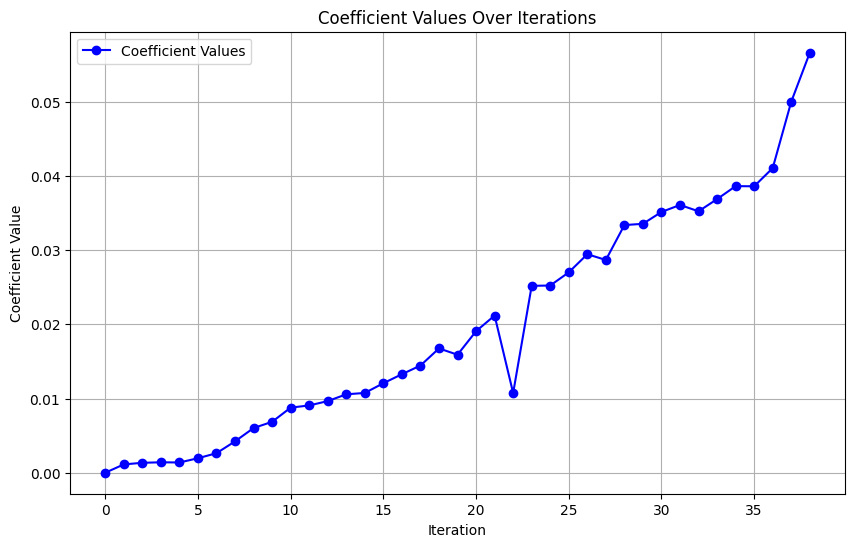

Backward Elimination Progress:  68%|██████▊   | 38/56 [00:08<00:04,  4.33it/s]


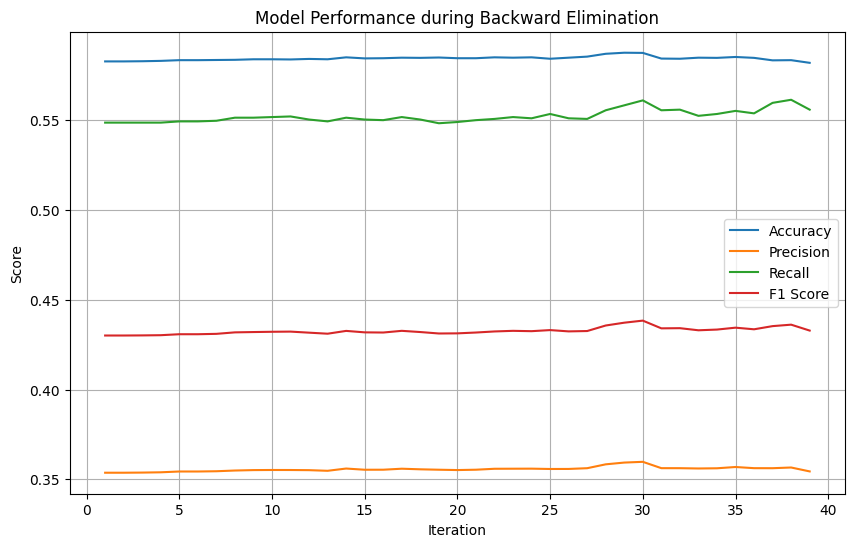


Removed Features:
['RVOwner', 'CallForwardingCalls', 'OptOutMailings', 'OwnsComputer', 'DroppedCalls', 'Occupation', 'TruckOwner', 'ReferralsMadeBySubscriber', 'NonUSTravel', 'OffPeakCallsInOut', 'DirectorAssistedCalls', 'NewCellphoneUser', 'PrizmCode', 'Homeownership', 'BuysViaMailOrder', 'NotNewCellphoneUser', 'CallWaitingCalls', 'ServiceArea', 'UnansweredCalls', 'ReceivedCalls', 'OwnsMotorcycle', 'InboundCalls', 'OutboundCalls', 'AdjustmentsToCreditRating', 'AgeHH2', 'HandsetModels', 'MaritalStatus', 'BlockedCalls', 'RetentionOffersAccepted', 'ThreewayCalls', 'IncomeGroup', 'CustomerCareCalls', 'HandsetPrice', 'RoamingCalls', 'OverageMinutes', 'HandsetWebCapable', 'HasCreditCard', 'PeakCallsInOut']

Final Model Performance:
Final Model Accuracy: 0.5820246913580247
Precision: 0.3543998244459074
Recall: 0.5559380378657487
F1 Score: 0.43285982310372556

Removed Features:
['RVOwner', 'CallForwardingCalls', 'OptOutMailings', 'OwnsComputer', 'DroppedCalls', 'Occupation', 'TruckOwner', 'R

In [32]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1)
y = convert_data['Churn'].astype(int)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# 인덱스 재설정 (reset_index)
X_train = X_train_scaled.reset_index(drop=True)
X_test = X_test_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# LogisticRegression 모델로 후진제거 시작
def backward_elimination_logistic(X_train, X_test, y_train, y_test, significance_level=0.05):
    model = LogisticRegression(solver='liblinear', class_weight='balanced')  # 클래스 불균형 해결

    features = X_train.columns.tolist()
    num_features = len(features)

    # 지표를 저장할 리스트 초기화
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    coef_list = []

    # 제거된 컬럼명을 저장할 리스트
    removed_features = []

    with tqdm(total=num_features, desc='Backward Elimination Progress') as pbar:
        while len(features) > 0:
            # 모델 학습
            model.fit(X_train[features], y_train)

            # 모델 평가
            y_pred_class = model.predict(X_test[features])

            accuracy = accuracy_score(y_test, y_pred_class)
            precision = precision_score(y_test, y_pred_class)
            recall = recall_score(y_test, y_pred_class)
            f1 = f1_score(y_test, y_pred_class)

            # 지표 저장
            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            # 변수 중요도(coefficient) 확인
            coefficients = model.coef_[0]
            min_coefficient = np.min(np.abs(coefficients))
            coef_list.append(min_coefficient)

            # 가장 작은 절대값의 coefficient를 가진 변수 제거
            if min_coefficient < significance_level:
                worst_feature_index = np.argmin(np.abs(coefficients))
                worst_feature = features[worst_feature_index]

                # 해당 변수를 제거
                features.remove(worst_feature)
                removed_features.append(worst_feature)  # 제거된 변수 저장
                pbar.update(1)
            else:
                # 모든 변수의 coefficient가 유의미한 경우 루프 종료
                # 그래프 그리기
                plt.figure(figsize=(10, 6))
                plt.plot(coef_list, marker='o', linestyle='-', color='b', label='Coefficient Values')
                plt.title('Coefficient Values Over Iterations')
                plt.xlabel('Iteration')
                plt.ylabel('Coefficient Value')
                plt.grid(True)
                plt.legend()
                plt.show()
                break

    # 진행률 완료
    pbar.close()

    # 지표 그래프 시각화
    plot_metrics(accuracy_list, precision_list, recall_list, f1_list)

    # 제거된 컬럼명 출력
    print("\nRemoved Features:")
    print(removed_features)

    # 최종 피처와 모델 반환
    return X_train[features], X_test[features], model, removed_features

# 성능 지표 그래프 그리기
def plot_metrics(accuracy, precision, recall, f1):
    iterations = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(iterations, accuracy, label="Accuracy")
    plt.plot(iterations, precision, label="Precision")
    plt.plot(iterations, recall, label="Recall")
    plt.plot(iterations, f1, label="F1 Score")

    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.title("Model Performance during Backward Elimination")
    plt.legend()

    plt.grid(True)
    plt.show()

# 후진제거 실행
X_train_reduced, X_test_reduced, final_model, removed_features = backward_elimination_logistic(X_train_scaled, X_test_scaled, y_train, y_test)

# 최종 모델 학습 및 평가
final_model.fit(X_train_reduced, y_train)
y_pred_class = final_model.predict(X_test_reduced)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# 최종 평가 결과 출력
print("\nFinal Model Performance:")
print(f"Final Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 제거된 컬럼명 출력
print("\nRemoved Features:")
print(removed_features)


nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


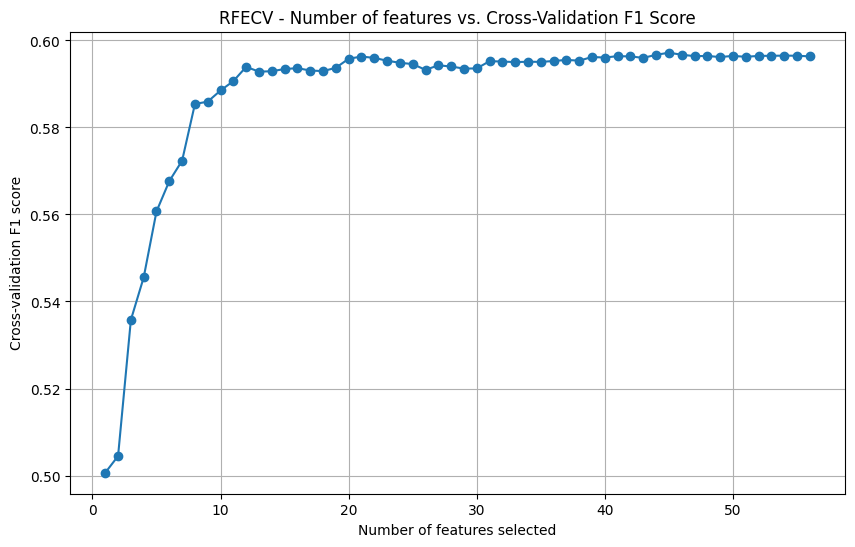

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pre_data as eda

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1)
y = convert_data['Churn'].astype(int)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 인덱스 재설정 (reset_index)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# 로지스틱 회귀 모델 선언
model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)

# 파이프라인을 사용하여 SMOTE 및 RFECV 적용
pipeline = make_pipeline(
    SMOTE(random_state=42),  # SMOTE를 교차 검증 내에서만 적용
    StandardScaler(),  # SMOTE 적용 후 다시 스케일링
    RFECV(
        estimator=model,
        step=1,  # 한 번에 하나의 피처씩 제거
        cv=StratifiedKFold(10),  # 10-fold Stratified KFold 사용
        scoring='f1',  # F1 스코어를 기준으로 피처 선택
        n_jobs=-1  # 모든 코어를 사용
    )
)

# 파이프라인으로 피처 선택 및 학습 수행
pipeline.fit(X_train, y_train)

# 선택된 피처 확인
rfecv = pipeline.named_steps['rfecv']
selected_features = X_train.columns[rfecv.support_]
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {list(selected_features)}")

# 최종 모델 학습 및 평가 (파이프라인을 사용한 예측)
y_pred_class = pipeline.predict(X_test)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# 최종 평가 결과 출력
print("\nFinal Model Performance with SMOTE:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 교차 검증 과정의 성능 지표 그래프 그리기
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation F1 score")
plt.title("RFECV - Number of features vs. Cross-Validation F1 Score")

# 각 단계별 선택된 피처 수
num_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)

# 평균 교차 검증 점수
mean_test_scores = rfecv.cv_results_['mean_test_score']

# 그래프 그리기
plt.plot(num_features, mean_test_scores, marker='o')
plt.grid(True)
plt.show()
